#RNN

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout, Activation


In [2]:
max_features = 10000
maxlen = 500
batch_size = 128


In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)


In [4]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


In [32]:
model_RNN = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid'),]
)


In [34]:
model_RNN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [35]:
model_RNN.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history_RNN = model_RNN.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3,
    validation_data=(x_val, y_val))


Epoch 1/5
196/196 [==============================] - 37s 183ms/step - loss: 0.5357 - acc: 0.7242 - val_loss: 0.3722 - val_acc: 0.8398
Epoch 2/5
196/196 [==============================] - 37s 189ms/step - loss: 0.3489 - acc: 0.8570 - val_loss: 0.2354 - val_acc: 0.9142
Epoch 3/5
196/196 [==============================] - 39s 199ms/step - loss: 0.2844 - acc: 0.8865 - val_loss: 0.2291 - val_acc: 0.9203
Epoch 4/5
196/196 [==============================] - 37s 190ms/step - loss: 0.2554 - acc: 0.9008 - val_loss: 0.5344 - val_acc: 0.8234
Epoch 5/5
196/196 [==============================] - 32s 166ms/step - loss: 0.2220 - acc: 0.9171 - val_loss: 0.1711 - val_acc: 0.9357


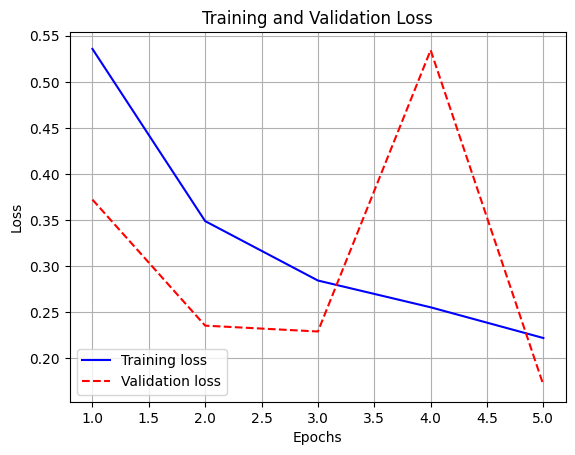

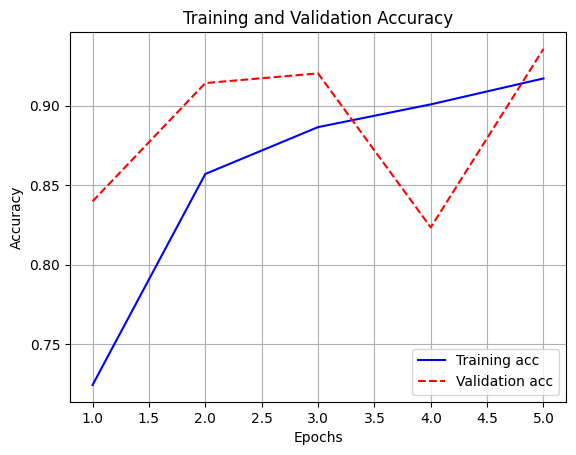

In [37]:
history_dict = history_RNN.history

epochs = range(1, len(history_dict['acc']) + 1)




plt.plot(epochs, history_dict['loss'], 'b-', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'r--', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

plt.clf()

# Plot training and validation accuracy
plt.plot(epochs, history_dict['acc'], 'b-', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'r--', label='Validation acc')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

In [38]:
test_loss, test_acc = model_RNN.evaluate(X_test, y_test)


782/782 [==============================] - 20s 26ms/step - loss: 0.3703 - acc: 0.8590


#LSTM

In [43]:
model_LSTM = Sequential([

    Embedding(max_features, 32),
    LSTM(units = 32),
    Dense(1, activation='sigmoid'),]

)

In [44]:

model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history_LSTM = model_LSTM.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3, validation_data=(x_val, y_val))

Epoch 1/5
196/196 [==============================] - 80s 395ms/step - loss: 0.5251 - accuracy: 0.7405 - val_loss: 0.3036 - val_accuracy: 0.8864
Epoch 2/5
196/196 [==============================] - 76s 387ms/step - loss: 0.2780 - accuracy: 0.8916 - val_loss: 0.2141 - val_accuracy: 0.9191
Epoch 3/5
196/196 [==============================] - 74s 378ms/step - loss: 0.1994 - accuracy: 0.9270 - val_loss: 0.1527 - val_accuracy: 0.9542
Epoch 4/5
196/196 [==============================] - 72s 369ms/step - loss: 0.1631 - accuracy: 0.9449 - val_loss: 0.1158 - val_accuracy: 0.9670
Epoch 5/5
196/196 [==============================] - 73s 374ms/step - loss: 0.1333 - accuracy: 0.9566 - val_loss: 0.0989 - val_accuracy: 0.9727


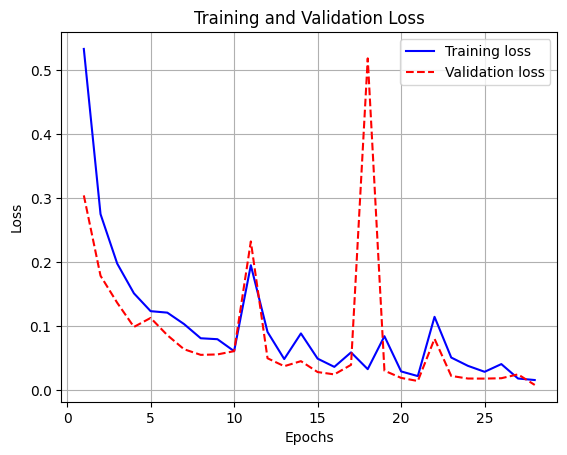

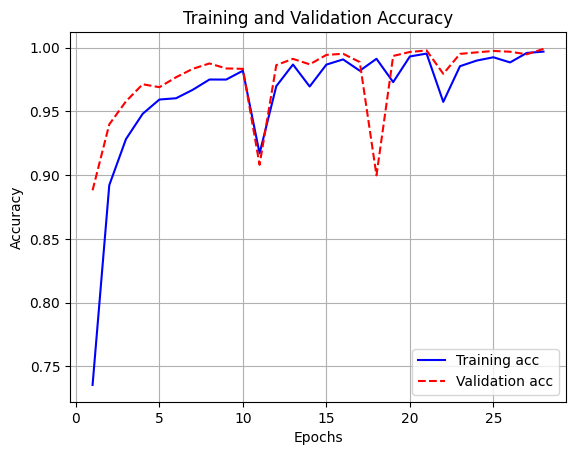

In [28]:
history_dict = history_LSTM.history

epochs = range(1, len(history_dict['accuracy']) + 1)




plt.plot(epochs, history_dict['loss'], 'b-', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'r--', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

plt.clf()

# Plot training and validation accuracy
plt.plot(epochs, history_dict['accuracy'], 'b-', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'r--', label='Validation acc')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

In [30]:
test_loss, test_acc = model_LSTM.evaluate(X_test, y_test)


782/782 [==============================] - 20s 26ms/step - loss: 1.0828 - acc: 0.7706


**Відповідь:** Обидві моделі є дуже вибагливими до гіперпараметрів та моють дуже довгий час навчання. Але в перспективі є досить точними, якщо правильно підібрати параметри.